# Análise de Risco no Transporte Público

## Este projeto faz parte da Formação Cientista de Dados da Data Science Academy.

## Fonte de Dados

O conjunto de dados lista incidentes de trânsito ocorridos na cidade de Londres. Os dados são reais e estão disponíveis publicamente no link: https://data.world/makeovermonday/2018w51

## Objetivo do Projeto

O objetivo deste projeto é analisar os dados e criar gráficos que respondam às seguintes perguntas:

1 - Qual a quantidade de incidentes por gênero?

2 - Qual faixa etária esteve mais envolvida nos incidentes?

3 - Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

4 - Como foi a evolução de incidentes por mês ao longo do tempo?

5 - Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

6 - Qual foi a média de incidentes por mês envolvendo crianças (Child)?

7 - Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

8 - No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

9 - Considerando o Operador qual a distribuição de incidentes ao longo do tempo?

10 - Qual o tipo de incidente mais comum com ciclistas?

## Ferramentas utilizadas e documentação

Para este projeto, foram utilizadas as linguagens Python e SQL.

Neste Jupyer Notebook, estão disponíveis os códigos em Python e os gráficos gerados.

## Importando pacotes e versões utilizadas

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [2]:
# Imports
from pandasql import sqldf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Pedro Henrique Coelho" --iversions

Author: Pedro Henrique Coelho

matplotlib: 3.7.0
numpy     : 1.23.5
pandas    : 1.5.3



## Carregando os dados

In [5]:
df = pd.read_excel('TFL Bus Safety.xlsx')

In [6]:
df.shape

(23158, 12)

In [7]:
df.info

<bound method DataFrame.info of        Year Date Of Incident    Route        Operator     Group Name  \
0      2015       2015-01-01        1  London General       Go-Ahead   
1      2015       2015-01-01        4       Metroline      Metroline   
2      2015       2015-01-01        5     East London     Stagecoach   
3      2015       2015-01-01        5     East London     Stagecoach   
4      2015       2015-01-01        6       Metroline      Metroline   
...     ...              ...      ...             ...            ...   
23153  2018       2018-09-01  (blank)     East London     Stagecoach   
23154  2018       2018-09-01  (blank)   London United  London United   
23155  2018       2018-09-01  (blank)   London United  London United   
23156  2018       2018-09-01  (blank)   London United  London United   
23157  2018       2018-09-01  (blank)       Metroline      Metroline   

                 Bus Garage               Borough  \
0      Garage Not Available             Southwark 

In [8]:
df.sample(5)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
7432,2016,2016-12-01,55,East London,Stagecoach,Leyton,Waltham Forest,Injuries treated on scene,Personal Injury,Passenger,Female,Unknown
20420,2018,2018-04-01,B11,London Central,Go-Ahead,Bexleyheath,Bexley,Injuries treated on scene,Personal Injury,Passenger,Female,Adult
12620,2017,2017-02-01,333,Arriva The Shires,Arriva The Shires,Brixton,Lambeth,Injuries treated on scene,Slip Trip Fall,Passenger,Male,Adult
2262,2015,2015-02-01,N47,East London,Stagecoach,Garage Not Available,Southwark,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Adult
20134,2018,2018-04-01,109,Abellio London,Abellio,Beddington (Abellio London),Croydon,Injuries treated on scene,Personal Injury,Passenger,Female,Adult


### Iniciando a exploração das Variáveis

In [9]:
df.columns

Index(['Year', 'Date Of Incident', 'Route', 'Operator', 'Group Name',
       'Bus Garage', 'Borough', 'Injury Result Description',
       'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age'],
      dtype='object')

In [10]:
df.isna().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64

In [11]:
df.dtypes

Year                                  int64
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
dtype: object

In [12]:
df['Date Of Incident'].describe()

count                   23158
unique                     45
top       2017-07-01 00:00:00
freq                      650
first     2015-01-01 00:00:00
last      2018-09-01 00:00:00
Name: Date Of Incident, dtype: object

Não temos valores NA, mas vamos checar se temos valores quenão representam nenhuma informação.

In [13]:
cols = ['Route', 'Operator', 'Group Name', 'Bus Garage', 'Borough', 'Injury Result Description',
        'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age']

In [14]:
for col in cols:
        print(col)
        print(df[col].where(df[col] == 'Unknown').count())

Route
0
Operator
0
Group Name
0
Bus Garage
0
Borough
0
Injury Result Description
0
Incident Event Type
0
Victim Category
0
Victims Sex
3602
Victims Age
7135


Removendo os registros com valores 'Unknown'

In [15]:
df.shape

(23158, 12)

In [16]:
df = df.loc[df['Victims Sex'] != 'Unknown']
df = df.loc[df['Victims Age'] != 'Unknown']

In [17]:
df.shape

(15312, 12)

In [18]:
df[cols].describe()

,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
count,15312,15312,15312,15312,15312,15312,15312,15312,15312,15312
unique,603,23,13,83,35,4,10,14,2,4
top,OOS,Metroline,Metroline,Garage Not Available,Westminster,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
freq,273,2781,3726,5226,1118,10868,4962,12007,9090,10595


## Respondendo as perguntas de negócio usando SQL

### 1 - Qual a quantidade de incidentes por gênero?

In [19]:
q1 = 'Select "Victims Sex", count(Year) as QuantidadeAcidentes from df group by "Victims Sex"'

In [20]:
df1 = sqldf(q1)
df1

,Victims Sex,QuantidadeAcidentes
0,Female,9090
1,Male,6222


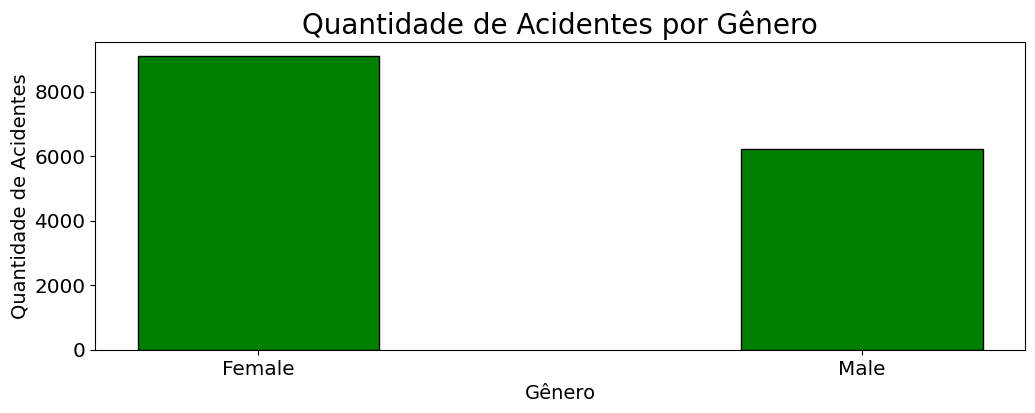

In [21]:
plt.bar(df1['Victims Sex'], df1['QuantidadeAcidentes'], color = 'green', edgecolor = 'black', width = 0.4)
plt.title('Quantidade de Acidentes por Gênero', fontsize = 20)
plt.xlabel('Gênero', fontsize = 14)
plt.ylabel('Quantidade de Acidentes', fontsize = 14)
plt.show()

### 2 - Qual faixa etária esteve mais envolvida nos incidentes?

In [22]:
q2 = 'Select "Victims Age", count(Year) as QuantidadeAcidentes from df group by "Victims Age"'

In [23]:
df2 = sqldf(q2)
df2

,Victims Age,QuantidadeAcidentes
0,Adult,10595
1,Child,1669
2,Elderly,2745
3,Youth,303


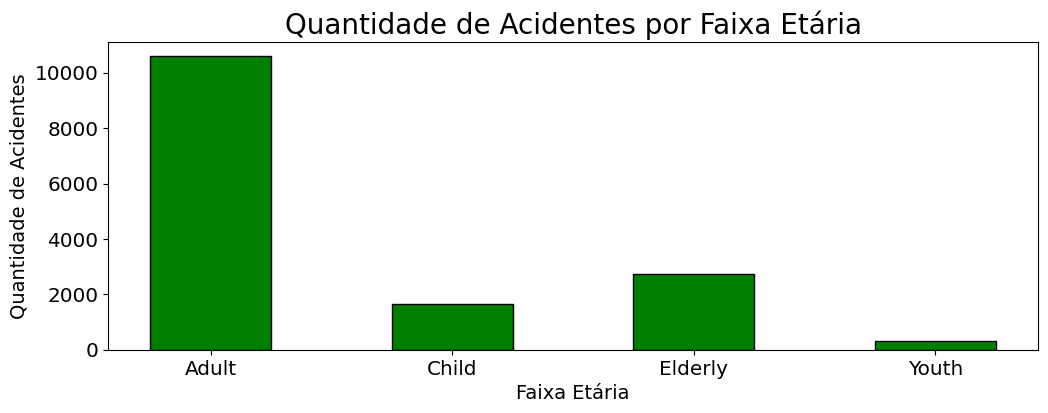

In [24]:
plt.bar(df2['Victims Age'], df2['QuantidadeAcidentes'], color = 'green', edgecolor = 'black', width = 0.5)
plt.title('Quantidade de Acidentes por Faixa Etária', fontsize = 20)
plt.xlabel('Faixa Etária', fontsize = 14)
plt.ylabel('Quantidade de Acidentes', fontsize = 14)
plt.show()

### 3 - Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [25]:
q3 = 'Select "Incident Event Type", count(Year) as QuantidadeAcidentes from df group by "Incident Event Type"'

In [26]:
df3 = sqldf(q3)

In [27]:
df3['Percentual'] = df3['QuantidadeAcidentes'] / df3['QuantidadeAcidentes'].sum() * 100
df3

,Incident Event Type,QuantidadeAcidentes,Percentual
0,Activity Incident Event,84,0.548589
1,Assault,510,3.330721
2,Collision Incident,2798,18.273250
3,Fire,3,0.019592
4,Onboard Injuries,3920,25.600836
5,Personal Injury,2929,19.128788
6,Robbery,3,0.019592
7,Safety Critical Failure,48,0.313480
8,Slip Trip Fall,4962,32.405956
9,Vandalism Hooliganism,55,0.359195


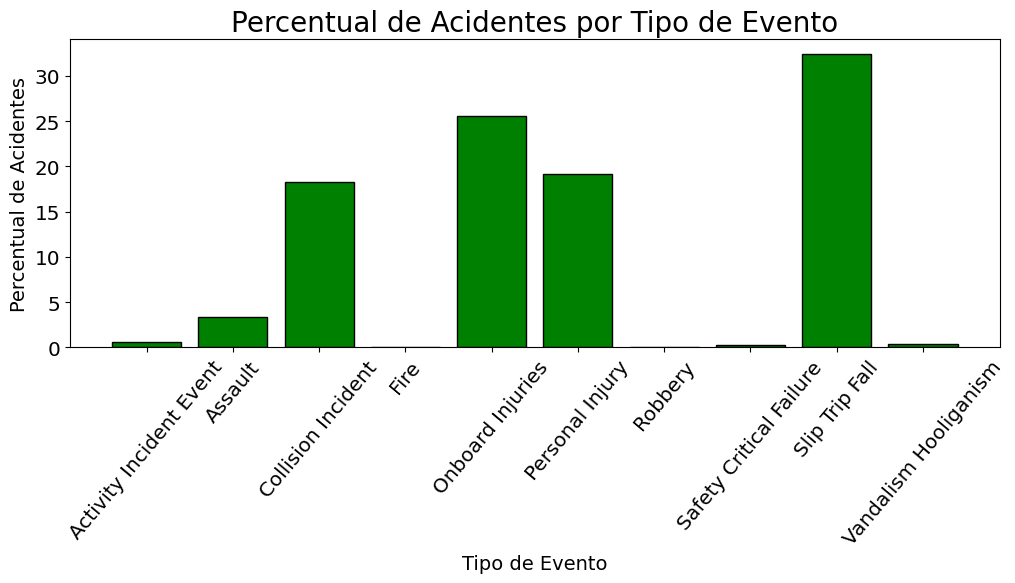

In [28]:
plt.bar(df3['Incident Event Type'], df3['Percentual'], color = 'green', edgecolor = 'black')
plt.title('Percentual de Acidentes por Tipo de Evento', fontsize = 20)
plt.xlabel('Tipo de Evento', fontsize = 14)
plt.ylabel('Percentual de Acidentes', fontsize = 14)
plt.xticks(rotation = 50)
plt.show()

### 4 - Como foi a evolução de incidentes por mês ao longo do tempo?

In [29]:
q4 = 'Select "Date of Incident" as Mes, count(Year) as QuantidadeAcidentes from df group by "Date of Incident"'

In [30]:
df4 = sqldf(q4)

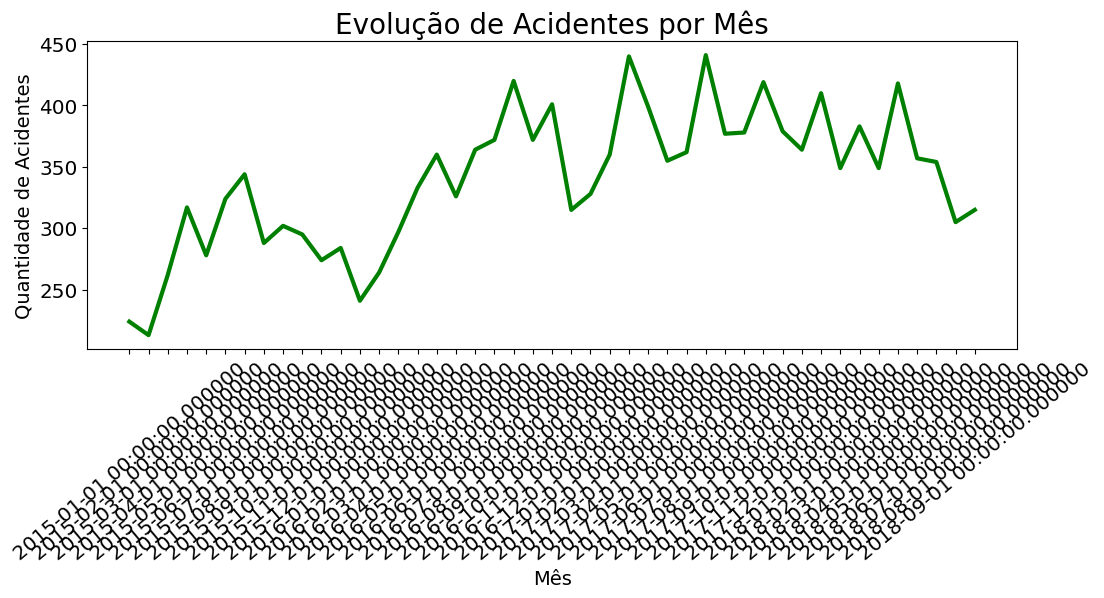

In [31]:
plt.plot(df4['Mes'], df4['QuantidadeAcidentes'], color = 'green', linewidth = 3)
plt.title('Evolução de Acidentes por Mês', fontsize = 20)
plt.xlabel('Mês', fontsize = 14)
plt.ylabel('Quantidade de Acidentes', fontsize = 14)
plt.xticks(rotation = 40)
plt.show()

### 5 - Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

In [32]:
q5 = 'Select "Incident Event Type" as "TipoDeIncidente", "Date of Incident" as "Data", "Victims Sex" as Genero, count("TipoDeIncidente") as Contagem from df where "TipoDeIncidente" = "Collision Incident" and "Victims Sex" = "Female" group by "Data" order by Contagem desc limit 3'

In [33]:
df5 = sqldf(q5)
df5

,TipoDeIncidente,Data,Genero,Contagem
0,Collision Incident,2016-11-01 00:00:00.000000,Female,43
1,Collision Incident,2015-09-01 00:00:00.000000,Female,42
2,Collision Incident,2016-09-01 00:00:00.000000,Female,39


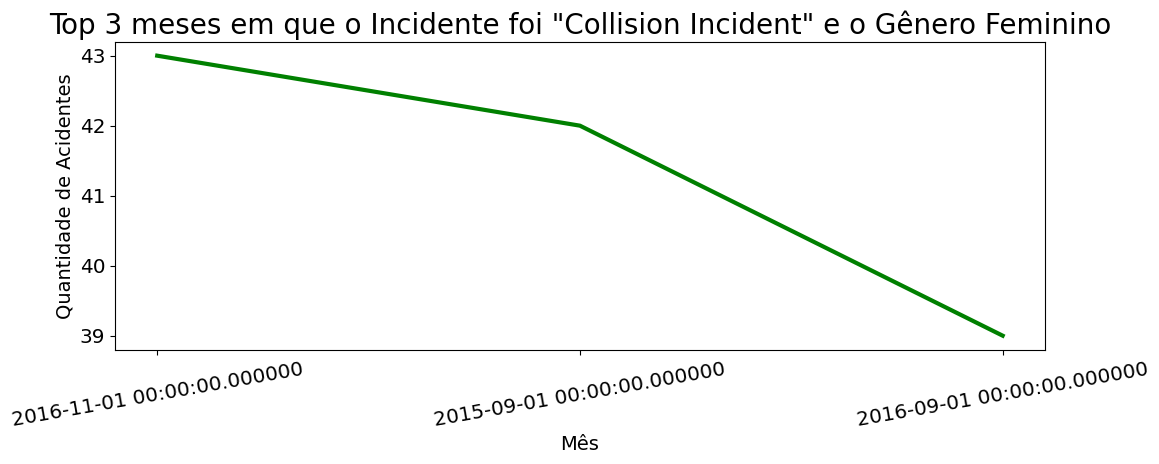

In [34]:
plt.plot(df5['Data'], df5['Contagem'], color = 'green')
plt.title('Top 3 meses em que o Incidente foi "Collision Incident" e o Gênero Feminino', fontsize = 20)
plt.xlabel('Mês', fontsize = 14)
plt.ylabel('Quantidade de Acidentes', fontsize = 14)
plt.xticks(rotation = 10)
plt.show()

### 6 - Qual foi a média de incidentes por mês envolvendo crianças (Child)?

In [35]:
q6 = 'Select "Victims Age" as FaixaEtaria, "Date of Incident" as Mes, count("FaixaEtaria") as Contagem from df where "Victims Age" = "Child" group by Mes'

In [36]:
df6 = sqldf(q6)

In [37]:
df6['Mes'] = pd.to_datetime(df6['Mes'])

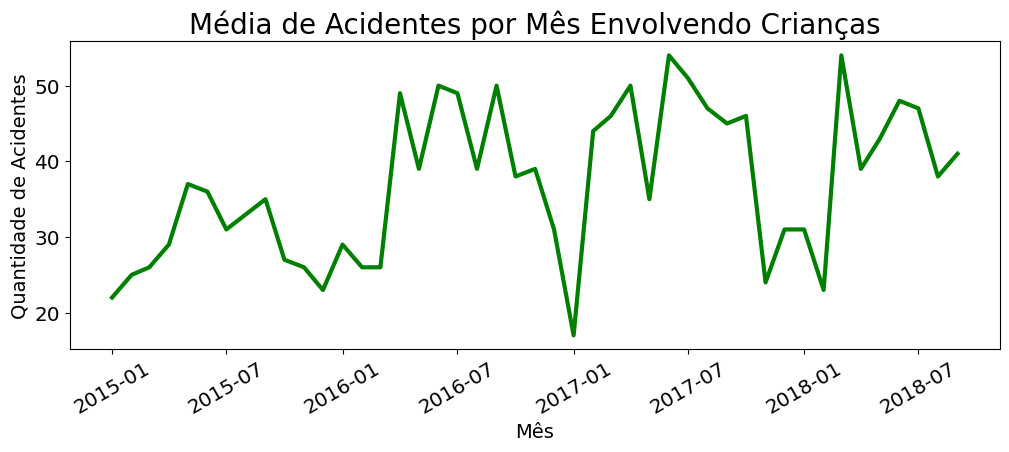

In [38]:
plt.plot(df6['Mes'], df6['Contagem'], color = 'green')
plt.title('Média de Acidentes por Mês Envolvendo Crianças', fontsize = 20)
plt.xlabel('Mês', fontsize = 14)
plt.ylabel('Quantidade de Acidentes', fontsize = 14)
plt.xticks(rotation = 30)
plt.show()

### 7 - Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

In [39]:
q7 = 'Select "Injury Result Description" as "Descricao", "Victims Sex" as "Genero", count("Genero") as Contagem from df where "Descricao" = "Injuries treated on scene" group by "Genero"'

In [40]:
df7 = sqldf(q7)
df7

,Descricao,Genero,Contagem
0,Injuries treated on scene,Female,6476
1,Injuries treated on scene,Male,4392


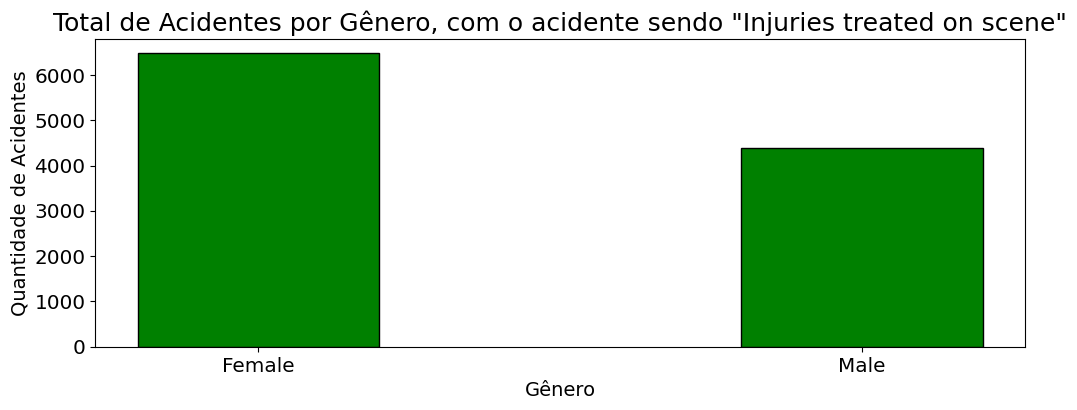

In [41]:
plt.bar(df7['Genero'], df7['Contagem'], color = 'green', edgecolor = 'black', width = 0.4)
plt.title('Total de Acidentes por Gênero, com o acidente sendo "Injuries treated on scene"', fontsize = 18)
plt.xlabel('Gênero', fontsize = 14)
plt.ylabel('Quantidade de Acidentes', fontsize = 14)
plt.show()

### 8 - No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

In [42]:
q8 = 'Select "Victims Age" as "FaixaEtaria", "Date of Incident" as "Data", count("FaixaEtaria") as Contagem from df where Year = 2017 and "FaixaEtaria" = "Elderly" group by "Data" order by Contagem desc'

In [43]:
df8 = sqldf(q8)

In [44]:
df8['Data'] = df8['Data'].astype('datetime64[ns]')
df8['Month'] = df8['Data'].dt.month
df8

,FaixaEtaria,Data,Contagem,Month
0,Elderly,2017-07-01,80,7
1,Elderly,2017-09-01,78,9
2,Elderly,2017-03-01,77,3
3,Elderly,2017-04-01,75,4
4,Elderly,2017-10-01,68,10
5,Elderly,2017-08-01,68,8
6,Elderly,2017-05-01,68,5
7,Elderly,2017-12-01,67,12
8,Elderly,2017-11-01,67,11
9,Elderly,2017-01-01,66,1


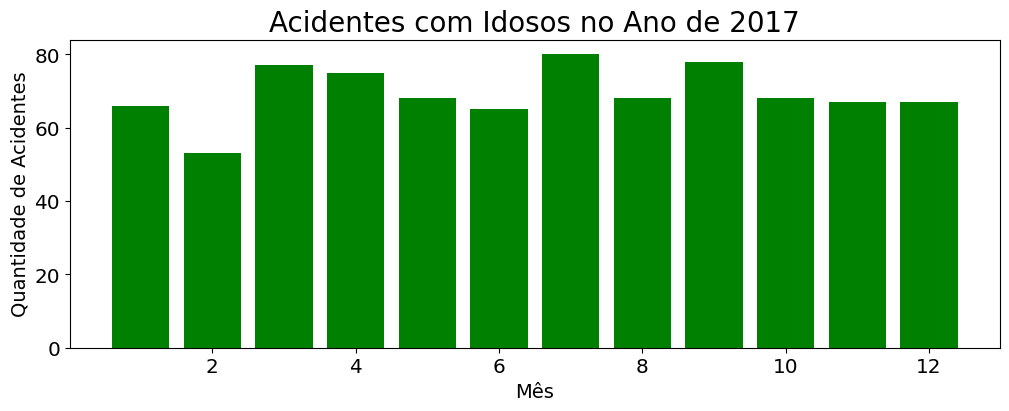

In [45]:
plt.bar(df8['Month'], df8['Contagem'], color = 'green')
plt.title('Acidentes com Idosos no Ano de 2017', fontsize = 20)
plt.xlabel('Mês', fontsize = 14)
plt.ylabel('Quantidade de Acidentes', fontsize = 14)
plt.show()

### 9 - Considerando o Operador qual a distribuição de incidentes ao longo do tempo?

In [46]:
q9 = 'Select "Date of Incident" as "Data", count("Operator") as Contagem, max("Operator") as Operator from df group by "Data"'

In [47]:
df9 = sqldf(q9)

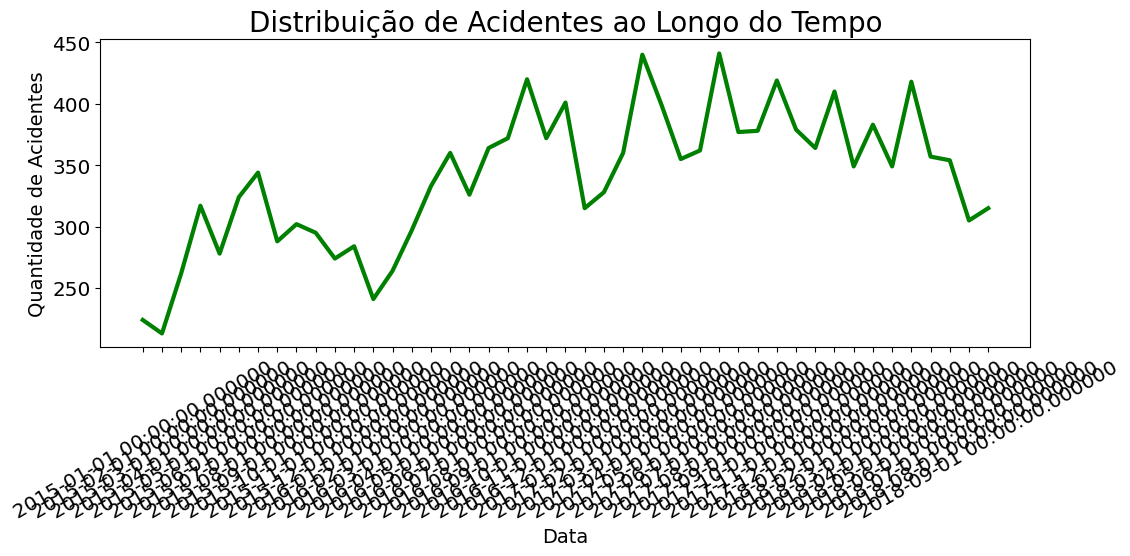

In [48]:
plt.plot(df9['Data'], df9['Contagem'], color = 'green')
plt.title('Distribuição de Acidentes ao Longo do Tempo', fontsize = 20)
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de Acidentes', fontsize = 14)
plt.xticks(rotation = 30)
plt.show()

### 10 - Qual o tipo de incidente mais comum com ciclistas?

In [49]:
q10 = 'Select "Victim Category" as "VitimaCategoria", "Incident Event Type" as "TipoDeIncidente", count("VitimaCategoria") as Contagem from df where "VitimaCategoria" = "Cyclist" group by "TipoDeIncidente" order by Contagem desc'

In [50]:
df10 = sqldf(q10)
df10

,VitimaCategoria,TipoDeIncidente,Contagem
0,Cyclist,Collision Incident,159
1,Cyclist,Personal Injury,7
2,Cyclist,Slip Trip Fall,5
3,Cyclist,Onboard Injuries,3


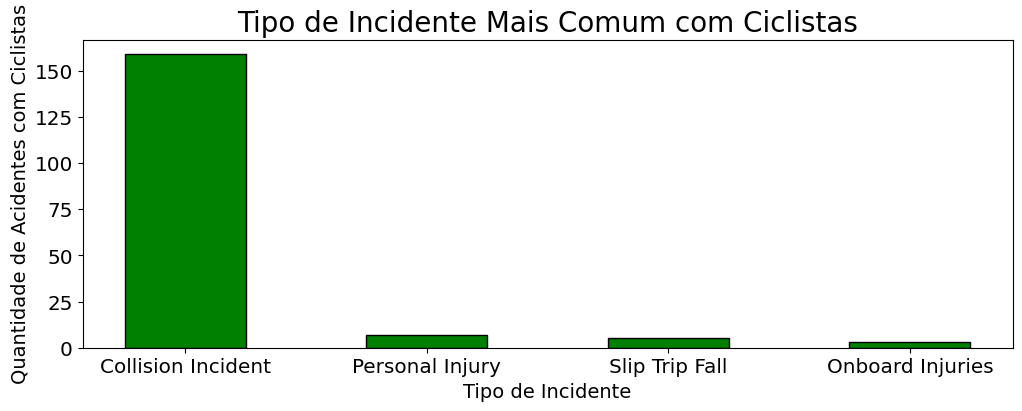

In [51]:
plt.bar(df10['TipoDeIncidente'], df10['Contagem'], color = 'green', edgecolor = 'black', width = 0.5)
plt.title('Tipo de Incidente Mais Comum com Ciclistas', fontsize = 20)
plt.xlabel('Tipo de Incidente', fontsize = 14)
plt.ylabel('Quantidade de Acidentes com Ciclistas', fontsize = 14)
plt.show()

# Fim